In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-01/bank.csv
/kaggle/input/bank-full-version1/bank-full.csv


# **Bank Marketing Campaign- Data Pre-Processing and Model Deployment**

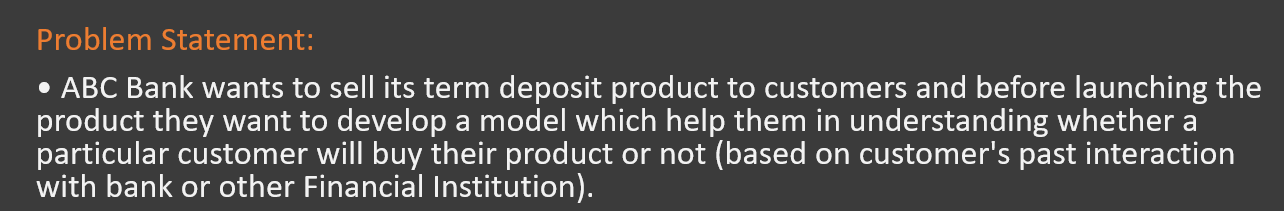

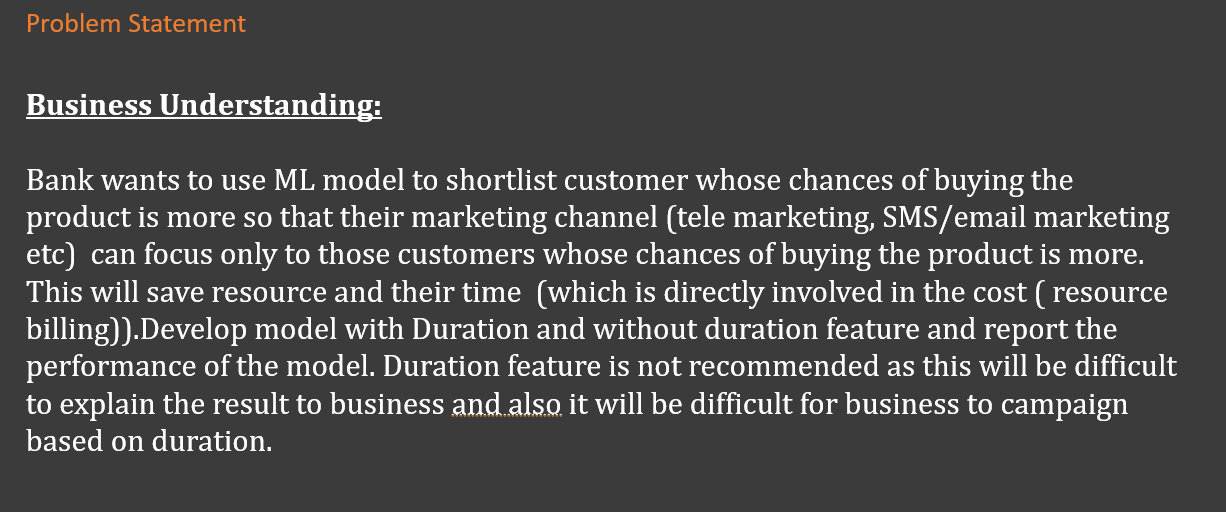

# **Data Pre-Processing**

# Steps of preprocessing of data

*  Import necessary library
*  Read Dataset
*  sanity check of dataStep
*  Exploratory Data Analysis (EDA)
*  Missing Value findings
*  Outliers findings
*  Duplicate Findings
*  Normalization
*  Encoding of Data



# Exploratory Data Analysis
* **Using Pandas for basic statistics,summary, and descriptive analysis.**
* **Create histograms,boxplots,scatter plots, and other visualization to understand data distribution and relationships.**
* **Identify outliers and anomalies that migth affect analysis.**
  


 #  **Importing Necessary Libraries**

 Importing Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # **Reading Dataset**

In [6]:
Bank_data = pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [7]:
import pandas as pd


Bank_data = pd.read_csv('/kaggle/input/bank-full-version1/bank-full.csv')

# Display column names
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [8]:
Bank_data.head()

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
Bank_data.isna().sum()

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#  **Sanity Check**

In [11]:
Bank_data.shape


(45211, 18)

In [12]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sl. no     45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [13]:
Bank_data.describe()

,sl. no,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
for col  in Bank_data.select_dtypes(include='object').columns:
    print (col)
    print(Bank_data[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [15]:
import numpy as np

# Identify features with missing values
features_na = [feature for feature in Bank_data.columns if Bank_data[feature].isnull().sum() > 0]

# Print the percentage of missing values for each feature with missing values
if features_na:
    for feature in features_na:
        print(f'{feature}: {np.round(Bank_data[feature].isnull().mean(), 4) * 100}% missing values')
else:
    print('No missing value found')


No missing value found


 **find features with one value**

In [16]:
for column in Bank_data.columns:
    print(column,Bank_data[column].nunique())

sl. no 45211
age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


**Explore categorical features**

In [17]:
categorical_features = [feature for feature in Bank_data.columns if (Bank_data[feature].dtypes == 'object') and (feature not in ['deposit'])]
categorical_features


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [22]:
# Identify discrete numerical features
discrete_features = [feature for feature in numerical_features if len(Bank_data[feature].unique()) < 25]

# Print the number of discrete numerical features
print('Discrete variables count: {}'.format(len(discrete_features)))

# Display the discrete numerical features
print(discrete_features)


Discrete variables count: 0
[]


In [23]:
# Identify continuous numerical features
continuous_numerical_features = [feature for feature in numerical_features if feature not in discrete_features and feature != 'y']

# Print the number of continuous numerical features
print('Continuous numerical features count: {}'.format(len(continuous_numerical_features)))

# Display the continuous numerical features
print(continuous_numerical_features)


Continuous numerical features count: 8
['sl. no', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [26]:
numerical_features=[feature for feature in Bank_data.columns if ((Bank_data[feature].dtypes != '0') and (feature not in ['y']))]
print('Number of numerical variables:'), len ('numerical_features')
Bank_data[numerical_features].head()

Number of numerical variables:


,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [ ]:
Bank_data.drop(['default'], inplace=True)

In [27]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [20]:
Bank_data = Bank_data.drop_duplicates()
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [24]:
Bank_data.isna().sum()

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [25]:

import pandas as pd

Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")


# Descriptive Statistics of the Numerical Column

In [26]:
Bank_data.describe()

,sl. no,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [33]:
# correlation with heatmap to interpret the relation and multicolliniarity

# Select numerical columns
numerical_columns = Bank_data.select_dtypes(include='number').columns

# Compute the correlation matrix
correlation_matrix = Bank_data[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


            sl. no       age   balance       day  duration  campaign  \
sl. no    1.000000  0.014973  0.073639 -0.061465  0.013031 -0.102884   
age       0.014973  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance   0.073639  0.097783  1.000000  0.004503  0.021560 -0.014578   
day      -0.061465 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration  0.013031 -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign -0.102884  0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays     0.437729 -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous  0.271098  0.001288  0.016674 -0.051710  0.001203 -0.032855   

             pdays  previous  
sl. no    0.437729  0.271098  
age      -0.023758  0.001288  
balance   0.003435  0.016674  
day      -0.093044 -0.051710  
duration -0.001565  0.001203  
campaign -0.088628 -0.032855  
pdays     1.000000  0.454820  
previous  0.454820  1.000000  


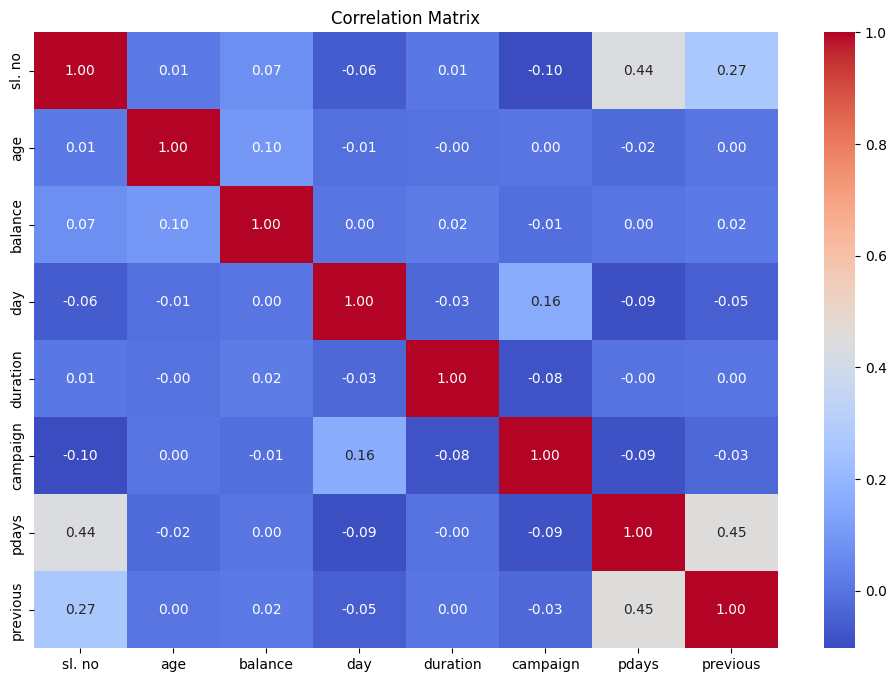

In [34]:
# correlation with heatmap to interpret the relation and multicolliniarity
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [39]:
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [42]:
import numpy as np

def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    return lw, up


In [43]:
lw, up = whisker(Bank_data['duration'])
print(f'Lower whisker: {lw}')
print(f'Upper whisker: {up}')


Lower whisker: -221.0
Upper whisker: 643.0


In [44]:
lw, up = whisker(Bank_data['campaign'])
print(f'Lower whisker: {lw}')
print(f'Upper whisker: {up}')


Lower whisker: -2.0
Upper whisker: 6.0


In [30]:
import numpy as np


df = Bank_data.copy()  


def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    return lw, up


for i in ['duration', 'campaign']:
    lw, up = whisker(Bank_data[i])
    df[i] = np.where(Bank_data[i] < lw, lw, Bank_data[i])
    df[i] = np.where(Bank_data[i] > up, up, Bank_data[i])

print(df.head())


   sl. no  age           job  marital  education default  balance housing  \
0       1   58    management  married   tertiary      no     2143     yes   
1       2   44    technician   single  secondary      no       29     yes   
2       3   33  entrepreneur  married  secondary      no        2     yes   
3       4   47   blue-collar  married    unknown      no     1506     yes   
4       5   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may     261.0       1.0     -1         0  unknown  no  
1   no  unknown    5   may     151.0       1.0     -1         0  unknown  no  
2  yes  unknown    5   may      76.0       1.0     -1         0  unknown  no  
3   no  unknown    5   may      92.0       1.0     -1         0  unknown  no  
4   no  unknown    5   may     198.0       1.0     -1         0  unknown  no  


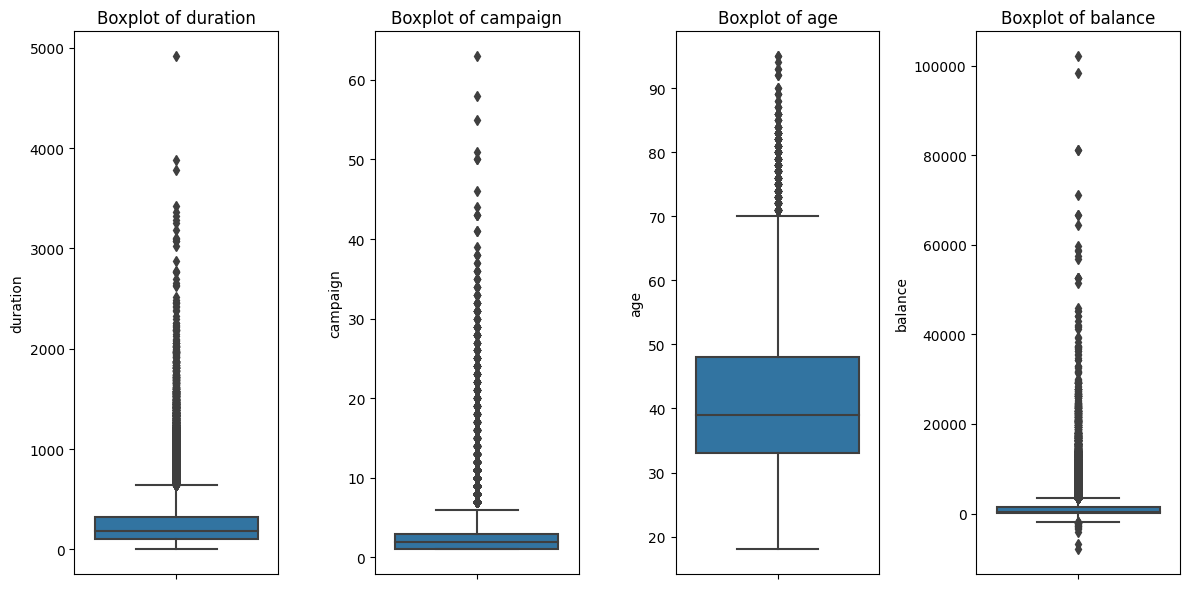

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


columns = ['duration', 'campaign', 'age', 'balance' ]


plt.figure(figsize=(12, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.boxplot(y=Bank_data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [28]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
import pandas as pd


x = pd.get_dummies(Bank_data.drop(['deposited?'], axis=1))
y = pd.get_dummies(Bank_data['deposited?'], drop_first=True)


x.columns = [col.lower() for col in x.columns]
y.columns = ['deposited']  

print(x.head())  
print(y.head())  

In [32]:
df

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,643.0,3.0,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456.0,2.0,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,643.0,5.0,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508.0,4.0,-1,0,unknown,no


In [33]:
newdataframe=df

In [34]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,643.0,3.0,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456.0,2.0,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,643.0,5.0,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508.0,4.0,-1,0,unknown,no


In [35]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Initialize newdataframe as a copy of Bank_data
newdataframe = Bank_data.copy()

for col in categorical_columns:
    newdataframe = pd.concat([newdataframe.drop(col, axis=1), pd.get_dummies(newdataframe[col], prefix=col)], axis=1)

newdataframe.head()


,sl. no,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,58,no,2143,yes,no,5,261,1,-1,...,False,False,True,False,False,False,False,False,False,True
1,2,44,no,29,yes,no,5,151,1,-1,...,False,False,True,False,False,False,False,False,False,True
2,3,33,no,2,yes,yes,5,76,1,-1,...,False,False,True,False,False,False,False,False,False,True
3,4,47,no,1506,yes,no,5,92,1,-1,...,False,False,True,False,False,False,False,False,False,True
4,5,33,no,1,no,no,5,198,1,-1,...,False,False,True,False,False,False,False,False,False,True


In [36]:
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [37]:
newdataframe1 = Bank_data.copy()


In [38]:
print(newdataframe1.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [39]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Initialize newdataframe as a copy of Bank_data
newdataframe1 = Bank_data.copy()

# Apply one-hot encoding to the specified categorical columns
for col in categorical_columns:
    if col in newdataframe1.columns:
        newdataframe1 = pd.concat(
            [newdataframe1.drop(col, axis=1),
             pd.get_dummies(newdataframe1[col], prefix=col, prefix_sep='-', drop_first=True, dummy_na=False)],
            axis=1
        )

# Verify the transformation
print(newdataframe.columns)


Index(['sl. no', 'age', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [40]:
import pandas as pd

# Initialize newdataframe as a copy of Bank_data
newdataframe1 = Bank_data.copy()

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Verify column names before processing
print("Original columns:", newdataframe1.columns)

# Apply one-hot encoding to the specified categorical columns
for col in categorical_columns:
    if col in newdataframe1.columns:
        newdataframe = pd.concat(
            [newdataframe1.drop(col, axis=1),
             pd.get_dummies(newdataframe1[col], prefix=col, prefix_sep='-', drop_first=1, dummy_na=0)],
            axis=1
        )

# Verify the transformation
print("Transformed columns:", newdataframe.columns)

# Display the first few rows of the updated DataFrame
newdataframe1.head()


Original columns: Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
Transformed columns: Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'poutcome-other', 'poutcome-success',
       'poutcome-unknown'],
      dtype='object')


,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
import pandas as pd

# Copy the original DataFrame to avoid modifying it directly
newdataframe = Bank_data.copy()

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply one-hot encoding to the specified categorical columns
for col in categorical_columns:
    if col in newdataframe.columns:
        newdataframe = pd.concat(
            [newdataframe.drop(col, axis=1),
             pd.get_dummies(newdataframe[col], prefix=col, prefix_sep='-', drop_first=1, dummy_na=0)],
            axis=1
        )

# Verify the transformation by displaying the column names
print("Transformed columns:", newdataframe.columns)

# Display the first few rows of the updated DataFrame
newdataframe.head()


Transformed columns: Index(['sl. no', 'age', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job-blue-collar',
       'job-entrepreneur', 'job-housemaid', 'job-management', 'job-retired',
       'job-self-employed', 'job-services', 'job-student', 'job-technician',
       'job-unemployed', 'job-unknown', 'marital-married', 'marital-single',
       'education-secondary', 'education-tertiary', 'education-unknown',
       'contact-telephone', 'contact-unknown', 'month-aug', 'month-dec',
       'month-feb', 'month-jan', 'month-jul', 'month-jun', 'month-mar',
       'month-may', 'month-nov', 'month-oct', 'month-sep', 'poutcome-other',
       'poutcome-success', 'poutcome-unknown'],
      dtype='object')


,sl. no,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month-jul,month-jun,month-mar,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown
0,1,58,no,2143,yes,no,5,261,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,2,44,no,29,yes,no,5,151,1,-1,...,False,False,False,True,False,False,False,False,False,True
2,3,33,no,2,yes,yes,5,76,1,-1,...,False,False,False,True,False,False,False,False,False,True
3,4,47,no,1506,yes,no,5,92,1,-1,...,False,False,False,True,False,False,False,False,False,True
4,5,33,no,1,no,no,5,198,1,-1,...,False,False,False,True,False,False,False,False,False,True


In [42]:
# Verify that the one-hot encoded columns contain only 0 and 1 values
binary_columns = [col for col in newdataframe.columns if any(prefix in col for prefix in categorical_columns)]
for col in binary_columns:
    unique_values = newdataframe[col].unique()
    print(f'Column {col}: unique values = {unique_values}')


Column job-blue-collar: unique values = [False  True]
Column job-entrepreneur: unique values = [False  True]
Column job-housemaid: unique values = [False  True]
Column job-management: unique values = [ True False]
Column job-retired: unique values = [False  True]
Column job-self-employed: unique values = [False  True]
Column job-services: unique values = [False  True]
Column job-student: unique values = [False  True]
Column job-technician: unique values = [False  True]
Column job-unemployed: unique values = [False  True]
Column job-unknown: unique values = [False  True]
Column marital-married: unique values = [ True False]
Column marital-single: unique values = [False  True]
Column education-secondary: unique values = [False  True]
Column education-tertiary: unique values = [ True False]
Column education-unknown: unique values = [False  True]
Column contact-telephone: unique values = [False  True]
Column contact-unknown: unique values = [ True False]
Column month-aug: unique values = [

In [43]:
# Define the boolean columns
boolean_columns = ['housing', 'loan', 'y']

# Initialize newdataframe1 as a copy of newdataframe
newdataframe1 = newdataframe.copy()

# Convert the boolean columns to binary (0 and 1)
for col in boolean_columns:
    newdataframe1[col + '-new'] = newdataframe1[col].apply(lambda x: 1 if x == 'yes' else 0)
    newdataframe1.drop(col, axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
newdataframe1.head()


,sl. no,age,default,balance,day,duration,campaign,pdays,previous,job-blue-collar,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,y-new
0,1,58,no,2143,5,261,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
1,2,44,no,29,5,151,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
2,3,33,no,2,5,76,1,-1,0,False,...,True,False,False,False,False,False,True,1,1,0
3,4,47,no,1506,5,92,1,-1,0,True,...,True,False,False,False,False,False,True,1,0,0
4,5,33,no,1,5,198,1,-1,0,False,...,True,False,False,False,False,False,True,0,0,0


In [44]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Initialize newdataframe as a copy of Bank_data
newdataframe = Bank_data.copy()

# Apply one-hot encoding to the specified categorical columns
for col in categorical_columns:
    newdataframe = pd.concat(
        [newdataframe.drop(col, axis=1),
         pd.get_dummies(newdataframe[col], prefix=col, prefix_sep='-', drop_first=True, dummy_na=False)],
        axis=1
    )

# Display the first few rows of the updated DataFrame
newdataframe.head()


,sl. no,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month-jul,month-jun,month-mar,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown
0,1,58,no,2143,yes,no,5,261,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,2,44,no,29,yes,no,5,151,1,-1,...,False,False,False,True,False,False,False,False,False,True
2,3,33,no,2,yes,yes,5,76,1,-1,...,False,False,False,True,False,False,False,False,False,True
3,4,47,no,1506,yes,no,5,92,1,-1,...,False,False,False,True,False,False,False,False,False,True
4,5,33,no,1,no,no,5,198,1,-1,...,False,False,False,True,False,False,False,False,False,True


In [45]:
newdataframe1.head()

,sl. no,age,default,balance,day,duration,campaign,pdays,previous,job-blue-collar,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,y-new
0,1,58,no,2143,5,261,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
1,2,44,no,29,5,151,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
2,3,33,no,2,5,76,1,-1,0,False,...,True,False,False,False,False,False,True,1,1,0
3,4,47,no,1506,5,92,1,-1,0,True,...,True,False,False,False,False,False,True,1,0,0
4,5,33,no,1,5,198,1,-1,0,False,...,True,False,False,False,False,False,True,0,0,0


# Renaming column (Feature Selection)

In [47]:
Bank_data.rename(columns = {'y':'deposited?'}, inplace = True)

In [48]:
newdataframe1

,sl. no,age,default,balance,day,duration,campaign,pdays,previous,job-blue-collar,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,y-new
0,1,58,no,2143,5,261,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
1,2,44,no,29,5,151,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
2,3,33,no,2,5,76,1,-1,0,False,...,True,False,False,False,False,False,True,1,1,0
3,4,47,no,1506,5,92,1,-1,0,True,...,True,False,False,False,False,False,True,1,0,0
4,5,33,no,1,5,198,1,-1,0,False,...,True,False,False,False,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,no,825,17,977,3,-1,0,False,...,False,True,False,False,False,False,True,0,0,1
45207,45208,71,no,1729,17,456,2,-1,0,False,...,False,True,False,False,False,False,True,0,0,1
45208,45209,72,no,5715,17,1127,5,184,3,False,...,False,True,False,False,False,True,False,0,0,1
45209,45210,57,no,668,17,508,4,-1,0,True,...,False,True,False,False,False,False,True,0,0,0


In [49]:
newdataframe1

,sl. no,age,default,balance,day,duration,campaign,pdays,previous,job-blue-collar,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,y-new
0,1,58,no,2143,5,261,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
1,2,44,no,29,5,151,1,-1,0,False,...,True,False,False,False,False,False,True,1,0,0
2,3,33,no,2,5,76,1,-1,0,False,...,True,False,False,False,False,False,True,1,1,0
3,4,47,no,1506,5,92,1,-1,0,True,...,True,False,False,False,False,False,True,1,0,0
4,5,33,no,1,5,198,1,-1,0,False,...,True,False,False,False,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,no,825,17,977,3,-1,0,False,...,False,True,False,False,False,False,True,0,0,1
45207,45208,71,no,1729,17,456,2,-1,0,False,...,False,True,False,False,False,False,True,0,0,1
45208,45209,72,no,5715,17,1127,5,184,3,False,...,False,True,False,False,False,True,False,0,0,1
45209,45210,57,no,668,17,508,4,-1,0,True,...,False,True,False,False,False,False,True,0,0,0


In [50]:
import pandas as pd

# Copy the dataframe
newdataframe1 = newdataframe.copy()

# List of boolean columns that need conversion
boolean_columns = ['housing', 'loan', 'y']

# Convert existing 'yes'/'no' columns to 1/0
for col in boolean_columns:
    newdataframe1[col + '-new'] = newdataframe1[col].apply(lambda x: 1 if x == 'yes' else 0)
    newdataframe1.drop(col, axis=1, inplace=True)

# Convert 'True'/'False' columns to 1/0
for col in newdataframe1.select_dtypes(include=['bool']).columns:
    newdataframe1[col] = newdataframe1[col].astype(int)

# Verify the transformation
print(newdataframe1.head())


   sl. no  age default  balance  day  duration  campaign  pdays  previous  \
0       1   58      no     2143    5       261         1     -1         0   
1       2   44      no       29    5       151         1     -1         0   
2       3   33      no        2    5        76         1     -1         0   
3       4   47      no     1506    5        92         1     -1         0   
4       5   33      no        1    5       198         1     -1         0   

   job-blue-collar  ...  month-may  month-nov  month-oct  month-sep  \
0                0  ...          1          0          0          0   
1                0  ...          1          0          0          0   
2                0  ...          1          0          0          0   
3                1  ...          1          0          0          0   
4                0  ...          1          0          0          0   

   poutcome-other  poutcome-success  poutcome-unknown  housing-new  loan-new  \
0               0             

In [51]:
newdataframe1.rename(columns = {'y-new':'deposited?'}, inplace = True)

# **DataFrame For Model Training**

In [52]:
# Model Training Dataframe 
newdataframe1

,sl. no,age,default,balance,day,duration,campaign,pdays,previous,job-blue-collar,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,deposited?
0,1,58,no,2143,5,261,1,-1,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2,44,no,29,5,151,1,-1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,3,33,no,2,5,76,1,-1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,4,47,no,1506,5,92,1,-1,0,1,...,1,0,0,0,0,0,1,1,0,0
4,5,33,no,1,5,198,1,-1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,no,825,17,977,3,-1,0,0,...,0,1,0,0,0,0,1,0,0,1
45207,45208,71,no,1729,17,456,2,-1,0,0,...,0,1,0,0,0,0,1,0,0,1
45208,45209,72,no,5715,17,1127,5,184,3,0,...,0,1,0,0,0,1,0,0,0,1
45209,45210,57,no,668,17,508,4,-1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [53]:
# Drop the 'default' column
newdataframe1.drop(['default'], axis=1, inplace=True)

# Verify the column has been dropped
print(newdataframe1.columns)


Index(['sl. no', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job-blue-collar', 'job-entrepreneur', 'job-housemaid',
       'job-management', 'job-retired', 'job-self-employed', 'job-services',
       'job-student', 'job-technician', 'job-unemployed', 'job-unknown',
       'marital-married', 'marital-single', 'education-secondary',
       'education-tertiary', 'education-unknown', 'contact-telephone',
       'contact-unknown', 'month-aug', 'month-dec', 'month-feb', 'month-jan',
       'month-jul', 'month-jun', 'month-mar', 'month-may', 'month-nov',
       'month-oct', 'month-sep', 'poutcome-other', 'poutcome-success',
       'poutcome-unknown', 'housing-new', 'loan-new', 'deposited?'],
      dtype='object')


# **DataFrame For Model Training** 

In [114]:
# Model Training Dataframe -Final
newdataframe1

,sl. no,age,balance,day,duration,campaign,pdays,previous,job-blue-collar,job-entrepreneur,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,deposited?
0,1,58,2143,5,261,1,-1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2,44,29,5,151,1,-1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,3,33,2,5,76,1,-1,0,0,1,...,1,0,0,0,0,0,1,1,1,0
3,4,47,1506,5,92,1,-1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,5,33,1,5,198,1,-1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,825,17,977,3,-1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45207,45208,71,1729,17,456,2,-1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45208,45209,72,5715,17,1127,5,184,3,0,0,...,0,1,0,0,0,1,0,0,0,1
45209,45210,57,668,17,508,4,-1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [55]:
from sklearn.model_selection import train_test_split

# Prepare features and target
x = newdataframe1.drop(['deposited?'], axis=1)
y = newdataframe1['deposited?']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f'Training data shape: {x_train.shape}, {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, {y_test.shape}')


Training data shape: (31647, 42), (31647,)
Testing data shape: (13564, 42), (13564,)


In [56]:
df_train = x_train.copy()
df_train['deposited?'] = y_train
df_train.head()

,sl. no,age,balance,day,duration,campaign,pdays,previous,job-blue-collar,job-entrepreneur,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,deposited?
10747,10748,36,0,17,153,4,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26054,26055,56,196,19,312,3,-1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
9125,9126,46,0,5,83,2,-1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
41659,41660,41,3426,1,302,1,119,5,0,0,...,0,0,1,0,0,1,0,0,0,0
4443,4444,38,0,20,90,1,-1,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [57]:
classes=df_train['deposited?'].value_counts()
normal_share=round(classes[0]/df_train['deposited?'].count()*100,2)
fraud_share=round(classes[1]/df_train['deposited?'].count()*100, 2)
print("Non-deposited? : {} %".format(normal_share))
print("deposited? : {} %".format(fraud_share))

Non-deposited? : 88.34 %
deposited? : 11.66 %


In [58]:
x_train=df_train.drop(['deposited?'],axis=1)
y_train=df_train['deposited?']

In [60]:
y_train

10747    0
26054    0
9125     0
41659    0
4443     0
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: deposited?, Length: 31647, dtype: int64

In [61]:
def evaluation_metrics(y_test, y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(y_test,y_pre))
    print("Precision :",precision_score(y_test,y_pre))
    print("Recall :",recall_score(y_test,y_pre))
    print("F1 Score :",f1_score(y_test,y_pre))

    print(classification_report(y_test, y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(y_test,  y_pre)
    auc = roc_auc_score(y_test, y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sns.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [62]:
target_names=['No Deposited', 'Deposited']

In [65]:
newdataframe1

,sl. no,age,balance,day,duration,campaign,pdays,previous,job-blue-collar,job-entrepreneur,...,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new,deposited?
0,1,58,2143,5,261,1,-1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2,44,29,5,151,1,-1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,3,33,2,5,76,1,-1,0,0,1,...,1,0,0,0,0,0,1,1,1,0
3,4,47,1506,5,92,1,-1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,5,33,1,5,198,1,-1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,825,17,977,3,-1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45207,45208,71,1729,17,456,2,-1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45208,45209,72,5715,17,1127,5,184,3,0,0,...,0,1,0,0,0,1,0,0,0,1
45209,45210,57,668,17,508,4,-1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [66]:
x_train

,sl. no,age,balance,day,duration,campaign,pdays,previous,job-blue-collar,job-entrepreneur,...,month-mar,month-may,month-nov,month-oct,month-sep,poutcome-other,poutcome-success,poutcome-unknown,housing-new,loan-new
10747,10748,36,0,17,153,4,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26054,26055,56,196,19,312,3,-1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
9125,9126,46,0,5,83,2,-1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
41659,41660,41,3426,1,302,1,119,5,0,0,...,0,0,0,1,0,0,1,0,0,0
4443,4444,38,0,20,90,1,-1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11285,44,1059,18,2093,1,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44732,44733,23,508,8,210,1,92,1,0,0,...,0,0,0,0,1,0,0,0,0,0
38158,38159,34,1317,15,239,1,-1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
860,861,33,165,7,111,1,-1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [67]:
# Check data types of columns
print(newdataframe1.dtypes)


sl. no                 int64
age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job-blue-collar        int64
job-entrepreneur       int64
job-housemaid          int64
job-management         int64
job-retired            int64
job-self-employed      int64
job-services           int64
job-student            int64
job-technician         int64
job-unemployed         int64
job-unknown            int64
marital-married        int64
marital-single         int64
education-secondary    int64
education-tertiary     int64
education-unknown      int64
contact-telephone      int64
contact-unknown        int64
month-aug              int64
month-dec              int64
month-feb              int64
month-jan              int64
month-jul              int64
month-jun              int64
month-mar              int64
month-may              int64
month-nov     

# **Ridge Classifier**

In [74]:
def evaluation_metrics(y_test, y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(y_test,y_pre))
    print("Precision :",precision_score(y_test,y_pre))
    print("Recall :",recall_score(y_test,y_pre))
    print("F1 Score :",f1_score(y_test,y_pre))

    print(classification_report(y_test, y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(y_test,  y_pre)
    auc = roc_auc_score(y_test, y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sns.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [75]:
def Ridge(x_train,x_test,y_train,y_test):
    #train the model
    model = RidgeClassifier(random_state=2)
    model.fit(x_train, y_train)
    #predictions
    y_pre = model.predict(x_test)
    evaluation_metrics(y_test, y_pre, target_names)

In [76]:
print(y_test.unique())

[0 1]


              precision    recall  f1-score   support

          No       0.91      0.98      0.95     11966
         Yes       0.67      0.30      0.41      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564

Accuracy: 0.8998083161309348
Precision: 0.6666666666666666
Recall: 0.29912390488110135
F1 Score: 0.41295896328293735
AUC: 0.9258005630052777


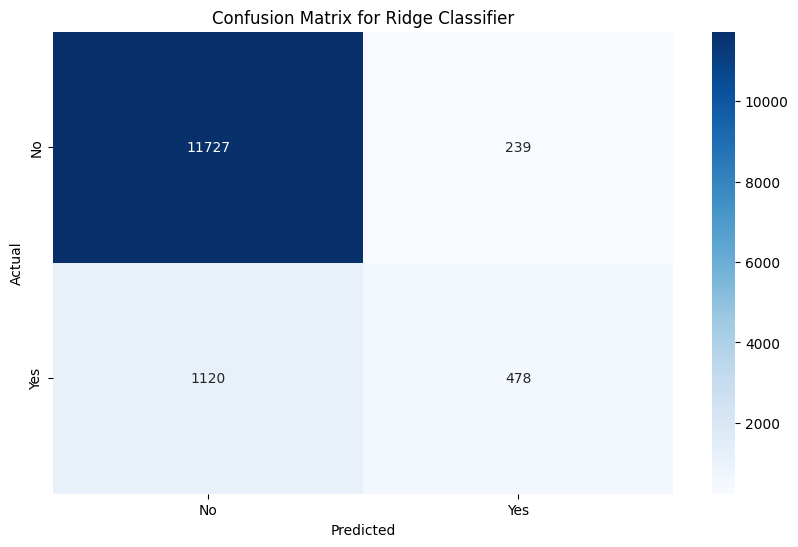

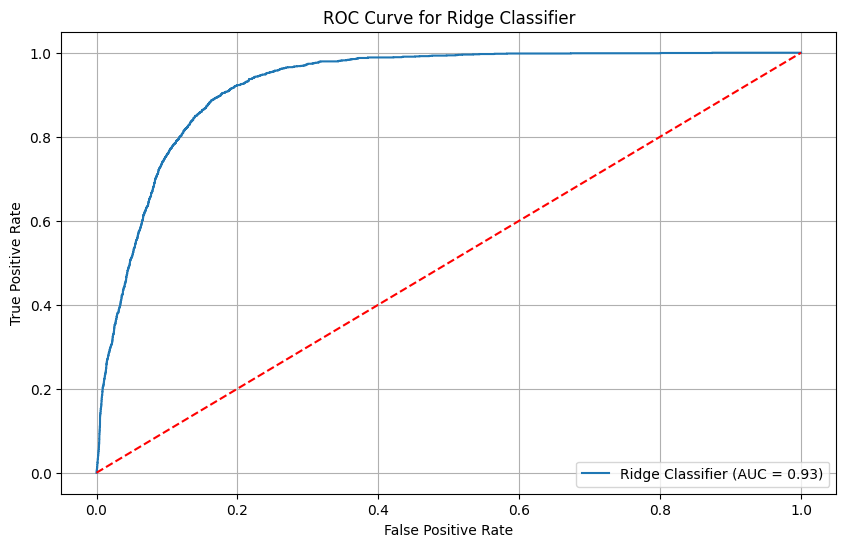

In [77]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluation_metrics(y_test, y_pred, target_names):
    # Scores
    report = classification_report(y_test, y_pred, target_names=target_names)
    print(report)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Precision, Recall, F1 Score
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1)}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1)}")

def Ridge(x_train, x_test, y_train, y_test):
    # Train the model
    model = RidgeClassifier(random_state=2)
    model.fit(x_train, y_train)
    # Predictions
    y_pred = model.predict(x_test)
    
    # Print evaluation metrics
    evaluation_metrics(y_test, y_pred, target_names=['No', 'Yes'])
    
    # Compute AUC
    y_scores = model.decision_function(x_test)
    auc_score = roc_auc_score(y_test, y_scores)
    print(f"AUC: {auc_score}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix for Ridge Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Ridge Classifier (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Ridge Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
Ridge(x_train, x_test, y_train, y_test)